# Logistic回归使用高阶特征

1. 标准化
2. 维度提升
3.Logistic 分类

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

In [2]:
# 获取数据
path = '../dataset/iris.data'  # 数据文件路径
data = pd.read_csv(path, header=None)
data[4] = pd.Categorical(data[4]).codes
x, y = np.split(data.values, (4,), axis=1)

# 仅使用前两列特征
x = x[:, :2]

In [3]:
# 训练并预测模型
x = x[:, :2]
lr = Pipeline([('sc', StandardScaler()),
               ('poly', PolynomialFeatures(degree=3)),
               ('clf', LogisticRegression())])
lr.fit(x, y.ravel())
y_hat = lr.predict(x)
y_hat_prob = lr.predict_proba(x)
np.set_printoptions(suppress=True)
print('y_hat = \n', y_hat)
print('y_hat_prob = \n', y_hat_prob)
print('accuracy：%.2f%%' % (100*np.mean(y_hat == y.ravel())))

y_hat = 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 2. 2. 2. 1. 2. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1.
 2. 1. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 1. 2. 1. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 1.
 2. 1. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 1. 2. 2. 2. 1. 2.
 2. 2. 2. 2. 2. 1.]
y_hat_prob = 
 [[0.99530146 0.0028266  0.00187194]
 [0.92038756 0.05651806 0.02309438]
 [0.99934956 0.00044225 0.0002082 ]
 [0.999764   0.00014598 0.00009002]
 [0.99984816 0.00007301 0.00007883]
 [0.99997885 0.00000028 0.00002087]
 [0.9999953  0.00000301 0.00000169]
 [0.99333991 0.00460184 0.00205825]
 [0.99998693 0.0000055  0.00000757]
 [0.95855595 0.03000191 0.01144214]
 [0.99743266 0.00046547 0.00210187]
 [0.99971396 0.0001941  0.00009194]
 [0.98017663 0.01346572 0.00635764]
 [0.99999964 0.00000014 0.00000023]
 [0.99982665 

In [4]:
# 采样测试点，并输出预测值
N, M = 500, 500     # 横纵各采样多少个值
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()   # 第0列的范围
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()   # 第1列的范围
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)                    # 生成网格采样点
x_test = np.stack((x1.flat, x2.flat), axis=1)   # 测试点

y_hat = lr.predict(x_test)                  # 预测值
y_hat = y_hat.reshape(x1.shape)                 # 使之与输入的形状相同

/Users/zhao/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


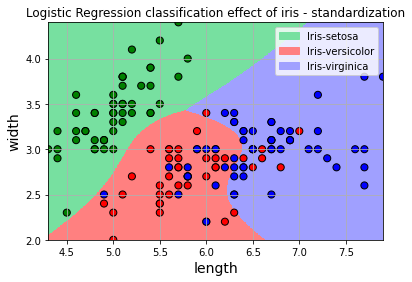

In [5]:
# 画图
cm_light = mpl.colors.ListedColormap(['#77E0A0', '#FF8080', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])

plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, y_hat, cmap=cm_light)     # 预测值的显示
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', s=50, cmap=cm_dark)    # 样本的显示
plt.xlabel('length', fontsize=14)
plt.ylabel('width', fontsize=14)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
patchs = [mpatches.Patch(color='#77E0A0', label='Iris-setosa'),
          mpatches.Patch(color='#FF8080', label='Iris-versicolor'),
          mpatches.Patch(color='#A0A0FF', label='Iris-virginica')]
plt.legend(handles=patchs, fancybox=True, framealpha=0.8)
plt.title('Logistic Regression classification effect of iris - standardization', fontsize=12)
plt.show()